In [1]:
# importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define data generator
datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]

# Define image dimensions and batch size
target_size = (64, 64)
batch_size = 32

# Path to the directory containing subfolders (each representing a class)
data_dir = 'dl-challenge-thomasmore-2023-2024/train/train'

# Get list of subfolders (classes)
classes = os.listdir(data_dir)

# Dictionary to store the number of images per class
num_images_per_class = {}

# Iterate over each subfolder and count the number of images
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_path))
    num_images_per_class[class_name] = num_images

# Print the number of images in each subfolder
print("Number of images per class:")
for class_name, num_images in num_images_per_class.items():
    print(f"{class_name}: {num_images}")

# Generate batches of image data
train_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assuming each subfolder represents a different class
    shuffle=True  # Shuffle the data
)

# Access images and labels
for images, labels in train_generator:
    # 'images' is a batch of images with shape (batch_size, 64, 64, 3)
    # 'labels' is an array of corresponding one-hot encoded labels with shape (batch_size, num_classes)
    
    # Process your images and labels here
    # Example: You can print the shape of images and labels
    print("Shape of images batch:", images.shape)
    print("Shape of labels batch:", labels.shape)
    
    # Example: Break the loop after processing one batch
    break


Number of images per class:
Cat: 414
Cheetah: 398
Leopard: 394
Lion: 409
Tiger: 411
Found 2026 images belonging to 5 classes.
Shape of images batch: (32, 64, 64, 3)
Shape of labels batch: (32, 5)


Shape of images batch: (32, 64, 64, 3)


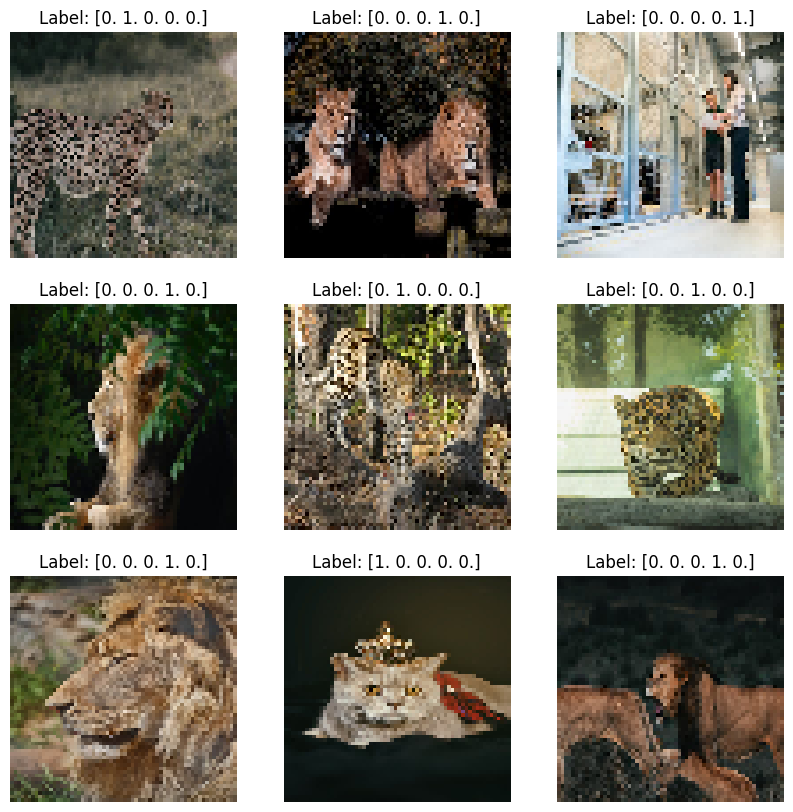

In [3]:
# Access images and labels
for images, labels in train_generator:
    # 'images' is a batch of images with shape (batch_size, 64, 64, 3)
    # 'labels' is an array of corresponding one-hot encoded labels with shape (batch_size, num_classes)
    
    # Print the shape of the first batch of images
    print("Shape of images batch:", images.shape)
    
    # Visualize a sample of images
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 10))
    for i in range(9):  # Visualize the first 9 images in the batch
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.show()
    
    # Example: Break the loop after processing one batch
    break


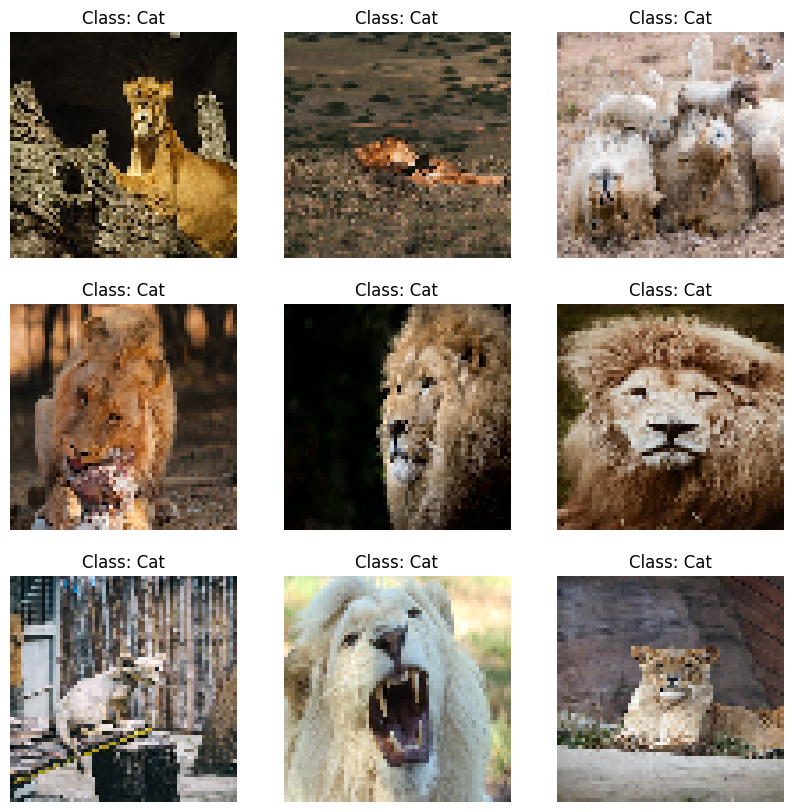

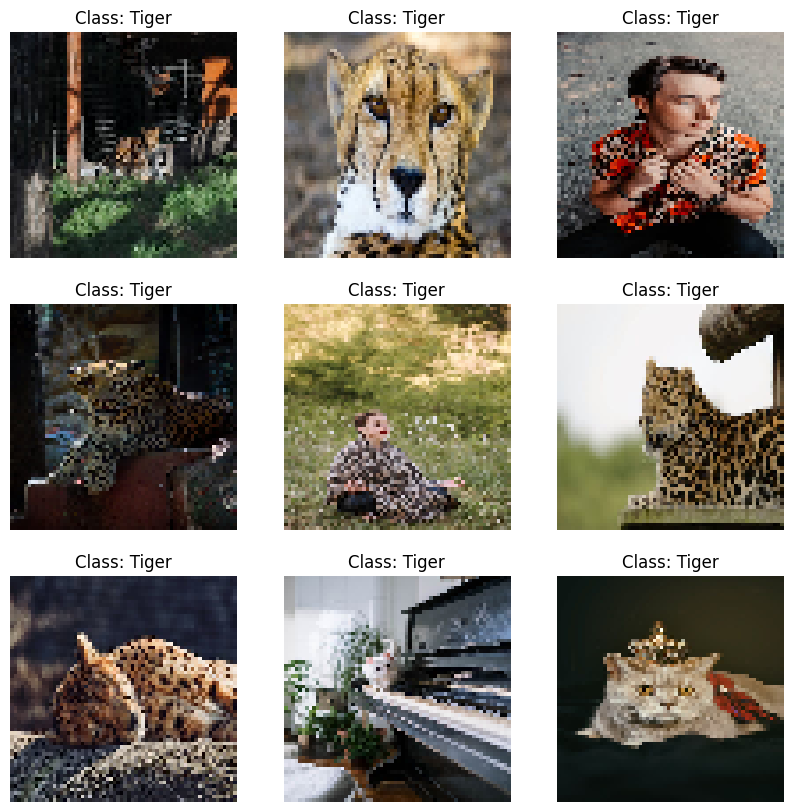

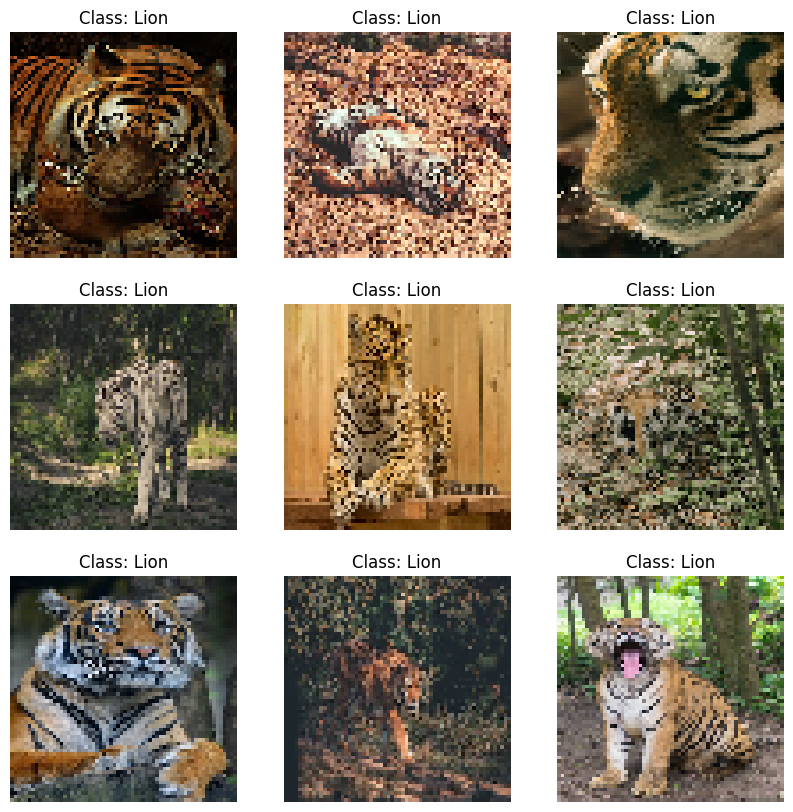

In [4]:
# Visualize a sample of images from different classes
import random

# Get a random sample of class names
sample_classes = random.sample(classes, k=min(len(classes), 3))

# Visualize images from each sampled class
for class_name in sample_classes:
    # Get a batch of images from the class
    class_images = []
    for images, labels in train_generator:
        class_indices = [i for i, label in enumerate(labels) if label[list(labels[0]).index(1)] == 1]
        class_images.extend(images[class_indices])
        if len(class_images) >= 9:  # Visualize 9 images from the class
            break
    
    # Visualize the sampled images
    plt.figure(figsize=(10, 10))
    for i, image in enumerate(class_images[:9]):
        plt.subplot(3, 3, i+1)
        plt.imshow(image)
        plt.title(f"Class: {class_name}")
        plt.axis("off")
    plt.show()


In [5]:
import cv2
import numpy as np

# Define a function to check image quality
def check_image_quality(image):
    # Convert image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Compute the standard deviation of pixel intensities
    std_dev = np.std(grayscale_image)
    
    # Define a threshold for acceptable standard deviation
    threshold = 10  # Adjust as needed
    
    # Check if the standard deviation is below the threshold
    if std_dev < threshold:
        return False  # Image quality is poor
    else:
        return True  # Image quality is acceptable

# Iterate through images and check quality
for images, labels in train_generator:
    for image in images:
        if not check_image_quality(image):
            print("Low quality image detected!")
            # Take appropriate action, such as removing the image or updating its label
            # Example: os.remove(image_path)
            # Note: Replace 'image_path' with the path to the image file
    break  # Only check the first batch


Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!


In [6]:
import os

# Path to the directory containing subfolders (each representing a class)
data_dir = 'dl-challenge-thomasmore-2023-2024/train/train'

# Get list of subfolders (classes)
classes = os.listdir(data_dir)

# Iterate over each subfolder and check file extensions
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    
    # Get list of files in the subfolder
    files = os.listdir(class_path)
    
    # Extract file extensions
    extensions = {os.path.splitext(file)[1] for file in files}
    
    # If there's only one unique extension, all images have the same format
    if len(extensions) == 1:
        print(f"All images in '{class_name}' have the same extension: {extensions.pop()}")
    else:
        print(f"Images in '{class_name}' have multiple extensions: {extensions}")


All images in 'Cat' have the same extension: .jpg
All images in 'Cheetah' have the same extension: .jpg
All images in 'Leopard' have the same extension: .jpg
All images in 'Lion' have the same extension: .jpg
All images in 'Tiger' have the same extension: .jpg


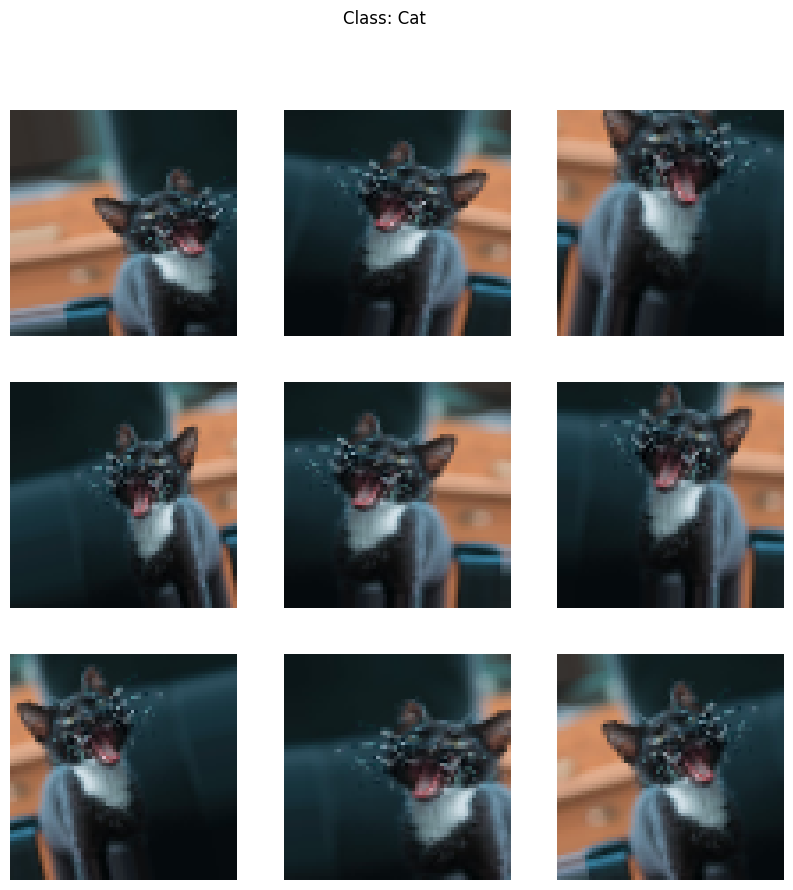

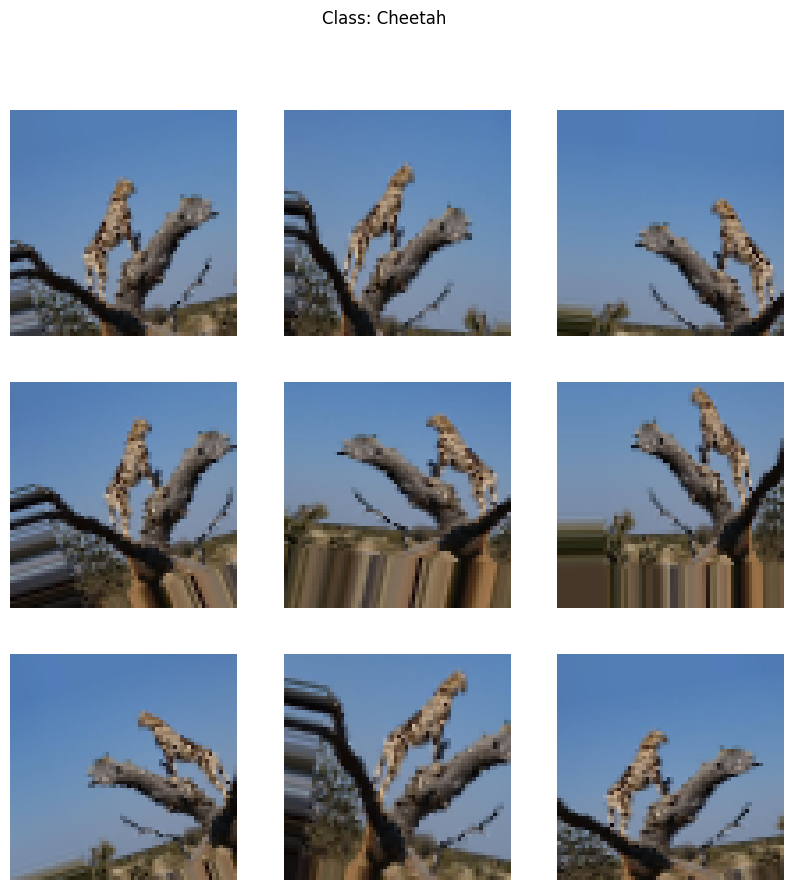

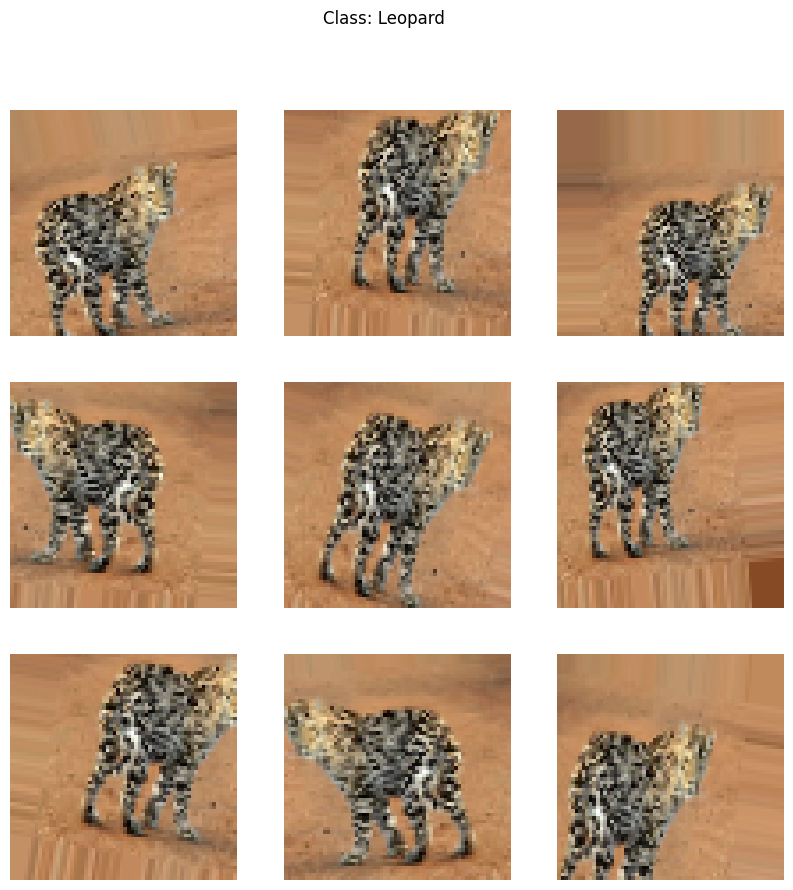

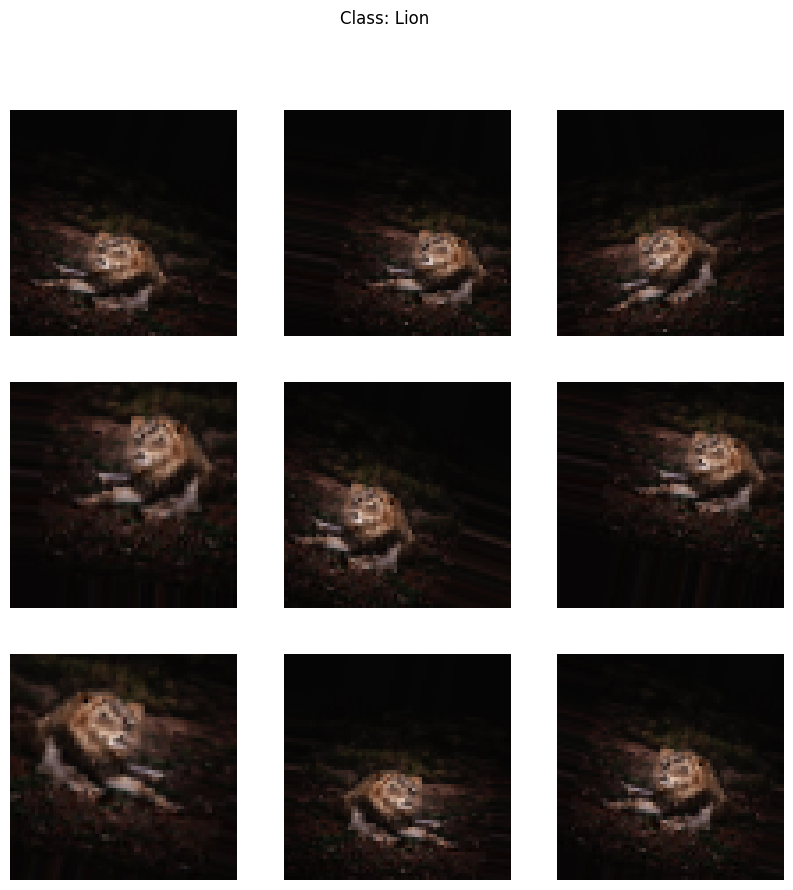

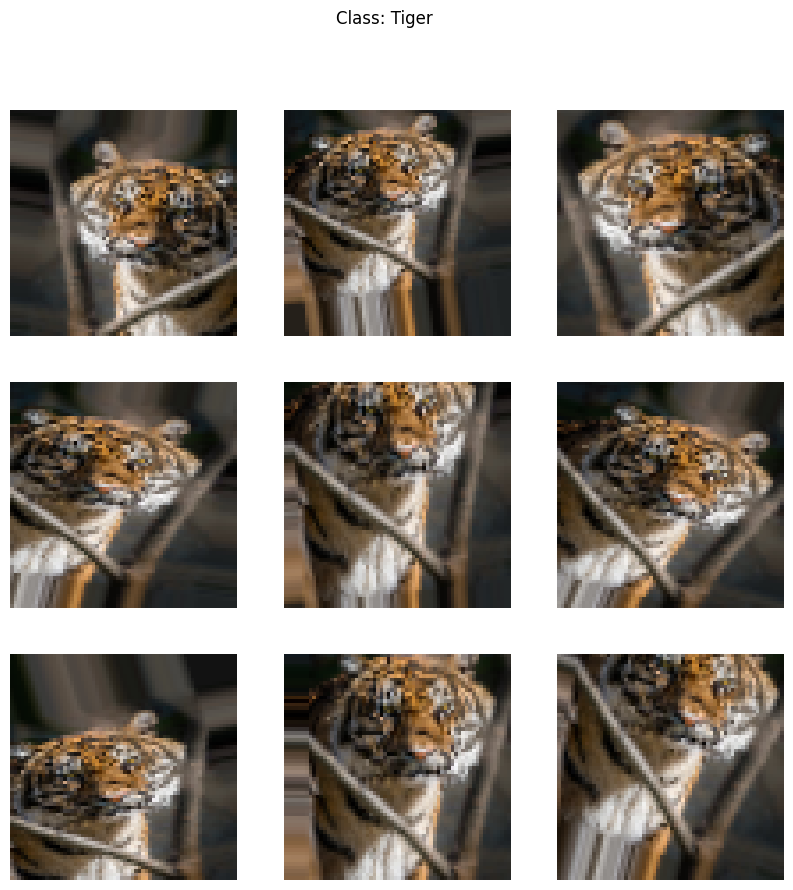

In [7]:
from tensorflow.keras.preprocessing import image

# Define data generator for augmentation
datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    shear_range=0.2,  # Shear images by up to 20 degrees
    zoom_range=0.2,  # Zoom images by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels using the nearest available value
)

# Define the directory containing subfolders (each representing a class)
data_dir = 'dl-challenge-thomasmore-2023-2024/train/train'

# Get list of subfolders (classes)
classes = [class_name for class_name in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, class_name))]

# Iterate over each class and visualize augmented images
for class_name in classes:
    # Construct the directory path for the class
    class_dir = os.path.join(data_dir, class_name)
    
    # Load a sample image from the class directory
    sample_image_path = os.path.join(class_dir, os.listdir(class_dir)[0])
    sample_image = image.load_img(sample_image_path, target_size=(64, 64))
    sample_image = image.img_to_array(sample_image)
    sample_image = sample_image.reshape((1,) + sample_image.shape)  # Add batch dimension
    
    # Visualize augmented images
    plt.figure(figsize=(10, 10))
    i = 0
    for batch in datagen_aug.flow(sample_image, batch_size=1):
        augmented_image = batch[0]
        plt.subplot(3, 3, i+1)
        plt.imshow(augmented_image)
        plt.axis('off')
        i += 1
        if i % 9 == 0:
            break  # Visualize 9 augmented images
    plt.suptitle(f"Class: {class_name}")
    plt.show()


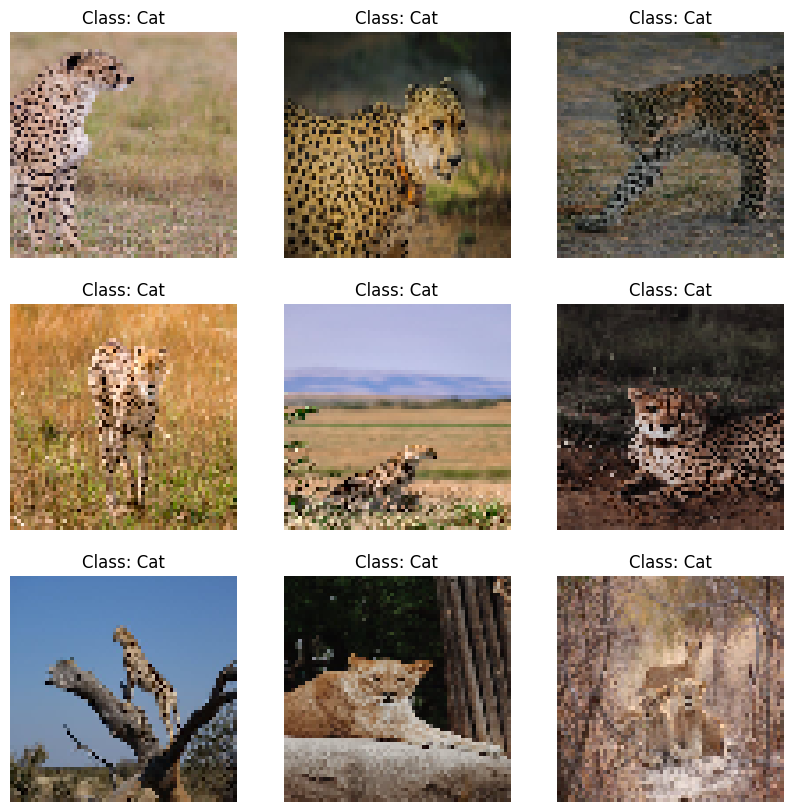

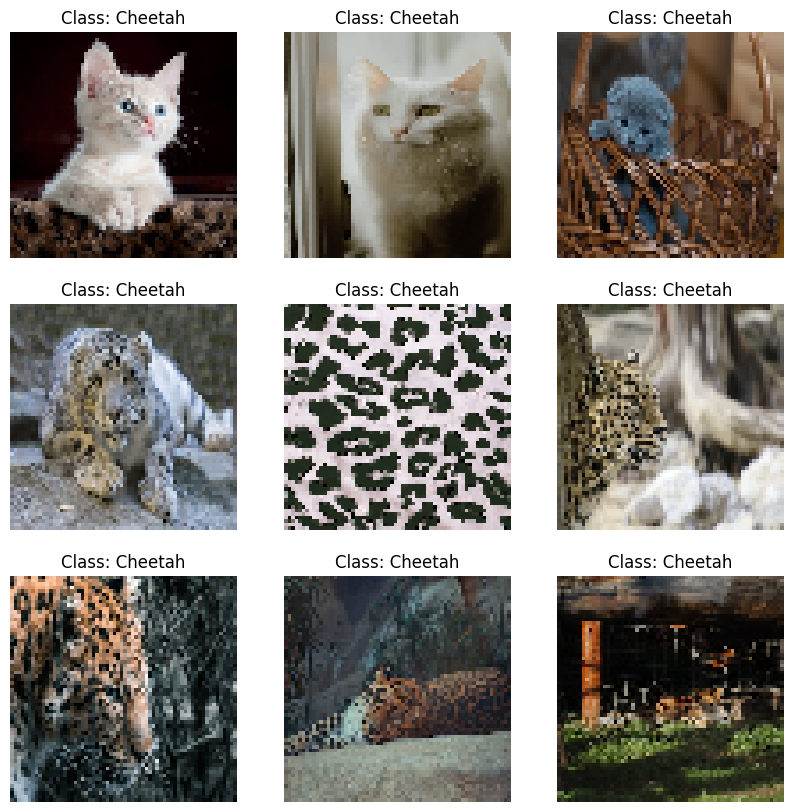

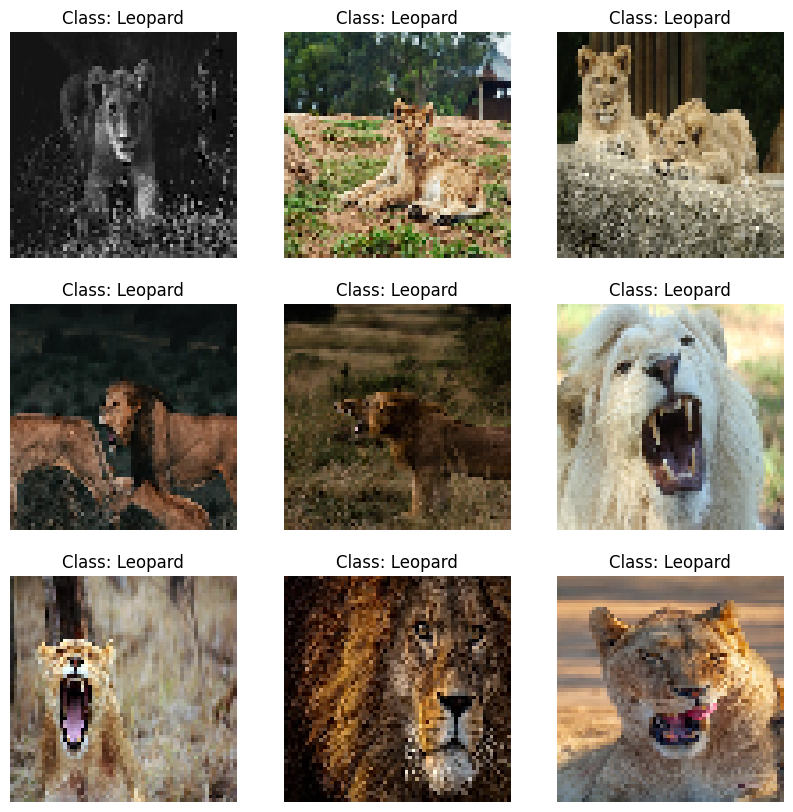

In [8]:
# Visualize a sample of images from different classes
import random

# Get a random sample of class names
sample_classes = random.sample(classes, k=min(len(classes), 3))

# Visualize images from each sampled class
for class_name in sample_classes:
    # Get a batch of images from the class
    class_images = []
    for images, labels in train_generator:
        class_indices = [i for i, label in enumerate(labels) if label[list(labels[0]).index(1)] == 1]
        class_images.extend(images[class_indices])
        if len(class_images) >= 9:  # Visualize 9 images from the class
            break
    
    # Visualize the sampled images
    plt.figure(figsize=(10, 10))
    for i, image in enumerate(class_images[:9]):
        plt.subplot(3, 3, i+1)
        plt.imshow(image)
        plt.title(f"Class: {class_name}")
        plt.axis("off")
    plt.show()


In [9]:
NUM_CLASSES = 1
IMG_SIZE = 64

# Create a sequential model with a list of layers
model = tf.keras.Sequential([

  # Add a resizing layer to resize the images to a consistent shape
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  # Add a rescaling layer to rescale the pixel values to the [0, 1] range
  layers.Rescaling(1./255),
  # Add some data augmentation layers to apply random transformations during training
  layers.RandomFlip("horizontal"),
  #layers.RandomShear(0.2),
  layers.RandomZoom(0.2),



  layers.Conv2D(32, (3, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(32, (3, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(), # Or, layers.GlobalAveragePooling2D()
  layers.Dense(128, activation="relu"),
  layers.Dense(NUM_CLASSES, activation="sigmoid")
])

# Compile and train your model as usual
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dl-challenge-thomasmore-2023-2024/train/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dl-challenge-thomasmore-2023-2024/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2026 images belonging to 5 classes.
Found 473 images belonging to 1 classes.


In [12]:
# Assuming chardet is already installed

import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Function to detect directory path encoding
def get_encoding(path):
  with open(path, 'rb') as f:
    rawdata = f.read()
  return detect(rawdata)['encoding']

# Replace 'your_data_path' with the actual path to your parent training data directory
train_encoding = get_encoding('dl-challenge-thomasmore-2023-2024/train/train')
validation_encoding = get_encoding('dl-challenge-thomasmore-2023-2024/train/train')  # Assuming validation data is also within "train" folder
test_encoding = get_encoding('dl-challenge-thomasmore-2023-2024/test')

# Define hyperparameters
batch_size = 32
image_size = (64, 64)
validation_split = 0.2

# Create training dataset
train_ds = image_dataset_from_directory(
  directory='dl-challenge-thomasmore-2023-2024/train/train',
  labels='inferred',
  label_mode='binary',
  batch_size=batch_size,
  image_size=image_size,
  validation_split=validation_split,
  subset='training',
  seed=123,
  encoding=train_encoding
)

# Create validation dataset (assuming validation data is within "train" folder)
validation_ds = image_dataset_from_directory(
  directory='dl-challenge-thomasmore-2023-2024/train/train',
  labels='inferred',
  label_mode='binary',
  batch_size=batch_size,
  image_size=image_size,
  validation_split=validation_split,
  subset='validation',
  seed=123,
  encoding=validation_encoding
)

# Create testing dataset
test_ds = image_dataset_from_directory(
  directory='dl-challenge-thomasmore-2023-2024/test',
  labels='inferred',
  label_mode='binary',
  batch_size=batch_size,
  image_size=image_size,
  encoding=test_encoding
)

# Ensure datasets can generate enough batches (repeat indefinitely)
train_ds = train_ds.repeat()
validation_ds = validation_ds.repeat()
test_ds = test_ds.repeat()

# Now you can proceed with building your model, training it with train_ds,
# evaluating it with validation_ds, and making predictions on test_ds


PermissionError: [Errno 13] Permission denied: 'dl-challenge-thomasmore-2023-2024/train/train'

In [82]:
# Define the number of epochs for training
epochs = 10

# Train your model
history = model.fit(
    train_ds,
    validation_data=validation_ds,  # Adding validation data
    epochs=epochs
)

# Evaluate your model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10


ValueError: as_list() is not defined on an unknown TensorShape.